## Import Library

In [1]:
import numpy as np
import pandas as pd
# import pmdarima as pm
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [2]:
df_cust = pd.read_csv('Case Study - Customer.csv', sep=';')
df_prod = pd.read_csv('Case Study - Product.csv', sep=';')
df_stor = pd.read_csv('Case Study - Store.csv', sep=';')
df_tran = pd.read_csv('Case Study - Transaction.csv', sep=';')

print(df_cust)
print(df_prod)
print(df_stor)
print(df_tran)

     CustomerID  Age  Gender Marital Status Income
0             1   55       1        Married   5,12
1             2   60       1        Married   6,23
2             3   32       1        Married   9,17
3             4   31       1        Married   4,87
4             5   58       1        Married   3,57
..          ...  ...     ...            ...    ...
442         443   33       1            NaN   9,28
443         444   53       0        Married  15,31
444         445   51       0        Married  14,48
445         446   57       0        Married   7,81
446         447   54       1        Married  20,37

[447 rows x 5 columns]
  ProductID   Product Name  Price
0        P1      Choco Bar   8800
1        P2  Ginger Candy    3200
2        P3       Crackers   7500
3        P4    Potato Chip  12000
4        P5       Thai Tea   4200
5        P6         Cashew  18000
6        P7   Coffee Candy   9400
7        P8            Oat  16000
8        P9        Yoghurt  10000
9       P10   Cheese Sti

## Data Customer Cleaning

In [3]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [4]:
df_cust.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [5]:
df_cust.duplicated().sum()

0

In [6]:
df_cust.dropna(inplace = True)
df_cust.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [7]:
df_cust['Income'] = df_cust['Income'].astype(str)
df_cust['Income'] = df_cust['Income'].str.replace(",", ".")
df_cust['Income'] = df_cust['Income'].astype(float)
df_cust.info()
df_cust.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      444 non-null    int64  
 1   Age             444 non-null    int64  
 2   Gender          444 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   Income          444 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 20.8+ KB


,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


## Data Product Cleaning

In [8]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [9]:
df_prod.isna().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [10]:
df_prod.duplicated().sum()

0

## Data Store Cleaning

In [11]:
df_stor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 804.0+ bytes


In [12]:
df_stor["Latitude"] = df_stor["Latitude"].str.replace(",", ".").astype(float)
df_stor["Longitude"] = df_stor["Longitude"].str.replace(",", ".").astype(float)


In [13]:
df_stor.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [14]:
df_stor.isna().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [15]:
df_stor.duplicated().sum()

0

## Data Transaction Cleaning

In [16]:
df_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [17]:
df_tran['Date'] = pd.to_datetime(df_tran['Date'])
df_tran.info()
df_tran.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


In [18]:
df_tran.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [19]:
df_tran.duplicated().sum()

0

## Data Merged

In [20]:
df1 = pd.merge(df_tran, df_cust, on='CustomerID', how='inner')
df2 = pd.merge(df1, df_stor, on = 'StoreID', how = 'inner')
df = pd.merge(df2, df_prod, on = 'ProductID', how = 'inner')
df.head()


,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 4975
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4976 non-null   object        
 1   CustomerID      4976 non-null   int64         
 2   Date            4976 non-null   datetime64[ns]
 3   ProductID       4976 non-null   object        
 4   Price_x         4976 non-null   int64         
 5   Qty             4976 non-null   int64         
 6   TotalAmount     4976 non-null   int64         
 7   StoreID         4976 non-null   int64         
 8   Age             4976 non-null   int64         
 9   Gender          4976 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          4976 non-null   float64       
 12  StoreName       4976 non-null   object        
 13  GroupStore      4976 non-null   object        
 14  Type            4976 non-null   object        
 15  Lati

In [22]:
df.isna().sum()

TransactionID     0
CustomerID        0
Date              0
ProductID         0
Price_x           0
Qty               0
TotalAmount       0
StoreID           0
Age               0
Gender            0
Marital Status    0
Income            0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
Product Name      0
Price_y           0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
df.drop(columns = 'Price_y', inplace = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 4975
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4976 non-null   object        
 1   CustomerID      4976 non-null   int64         
 2   Date            4976 non-null   datetime64[ns]
 3   ProductID       4976 non-null   object        
 4   Price_x         4976 non-null   int64         
 5   Qty             4976 non-null   int64         
 6   TotalAmount     4976 non-null   int64         
 7   StoreID         4976 non-null   int64         
 8   Age             4976 non-null   int64         
 9   Gender          4976 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          4976 non-null   float64       
 12  StoreName       4976 non-null   object        
 13  GroupStore      4976 non-null   object        
 14  Type            4976 non-null   object        
 15  Lati

## Data Regression

In [26]:
df_reg = df.groupby('Date').agg({'Qty':'sum'})
df_reg.info()
df_reg

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Qty     365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


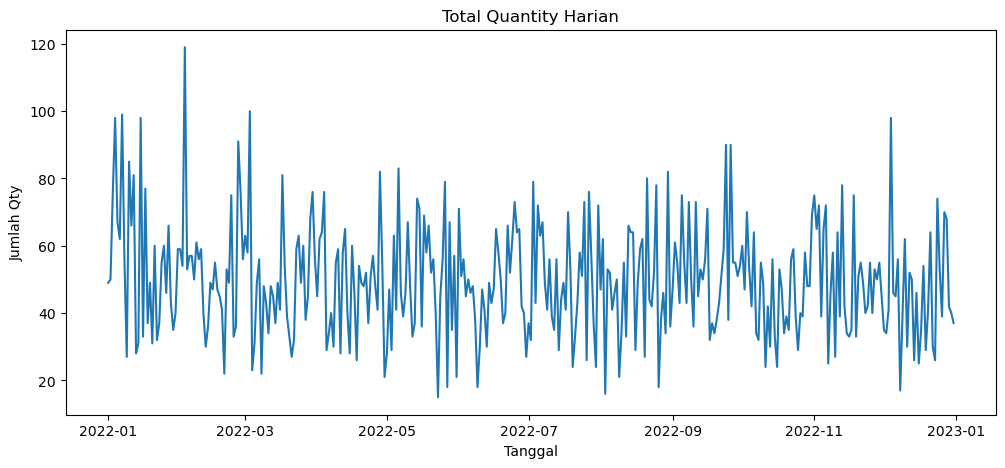

In [27]:
plt.figure(figsize=(12,5))
plt.plot(df_reg['Qty'])
plt.title('Total Quantity Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Qty')
plt.show()

Text(0.5, 1.0, 'Resid')

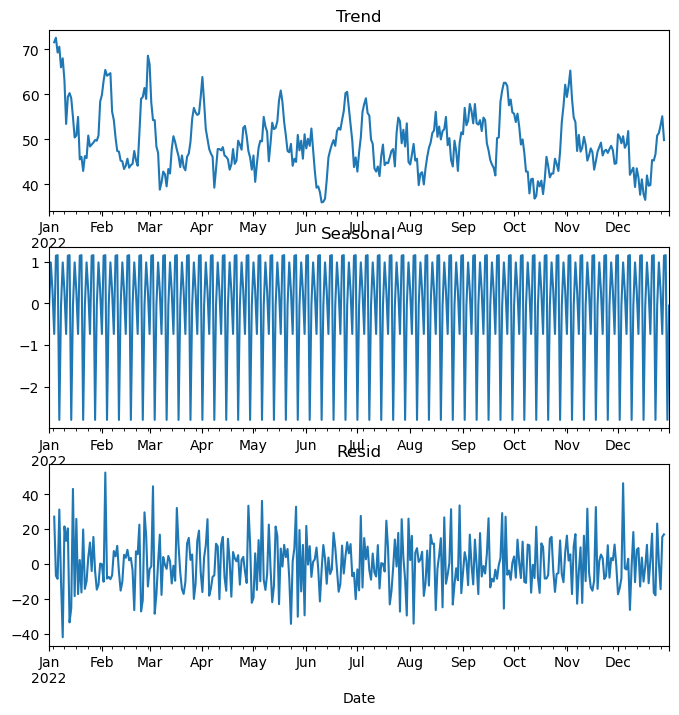

In [28]:
decomposed = seasonal_decompose(df_reg)
plt.figure(figsize=(8,8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonal')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Resid')

## Uji Stationer

In [29]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_reg['Qty'])
print('ADF Stats: %f' % result[0])
print('P-Value: %f' % result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))


ADF Stats: -19.091514
P-Value: 0.000000
Critical Values: 
	1%: -3.448
	5%: -2.870
	10%: -2.571


## Data Stationary Check

In [30]:
train_size = int(len(df_reg) * 0.8)
train_data, test_data = df_reg[:train_size], df_reg[train_size:]
train_data.shape, test_data.shape

((292, 1), (73, 1))

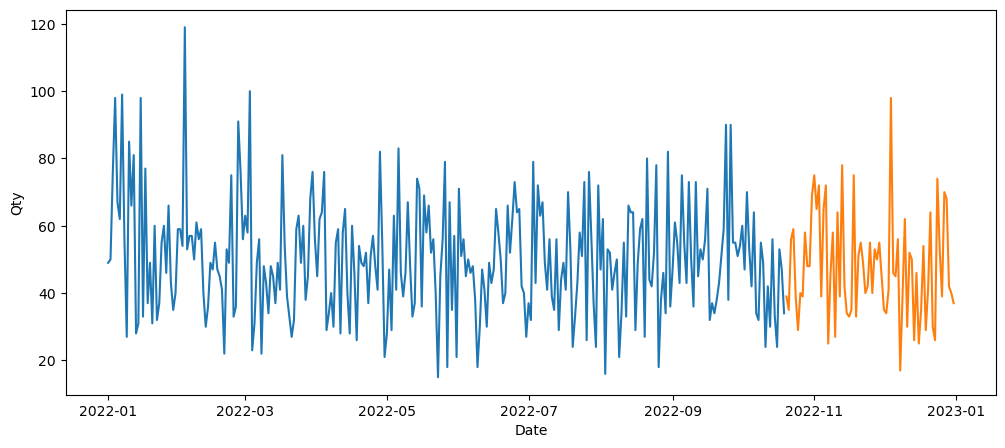

In [31]:
plt.figure(figsize=(12,5))
sns.lineplot(data=train_data, x=train_data.index, y=train_data['Qty'])
sns.lineplot(data=test_data, x=test_data.index, y=test_data['Qty'])
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

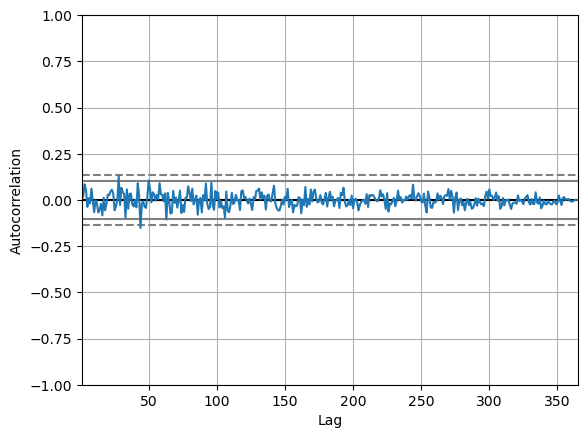

In [32]:
autocorrelation_plot(df_reg['Qty'])

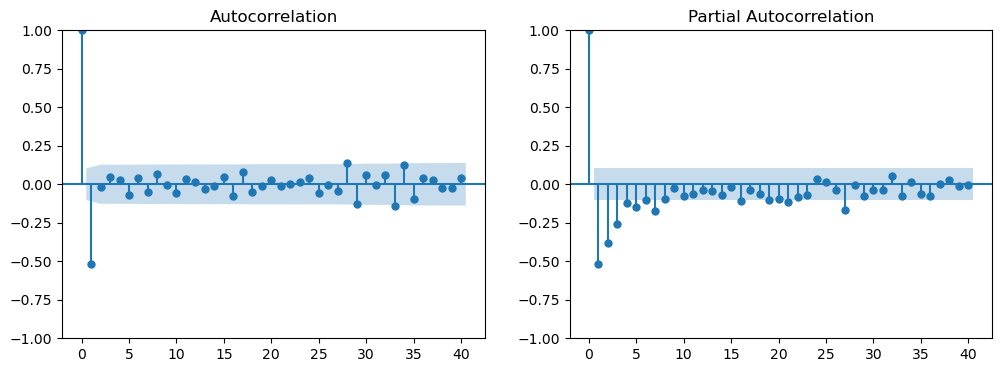

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_reg.diff().dropna(), lags=40, ax=ax[0])
plot_pacf(df_reg.diff().dropna(), lags=40, ax=ax[1])
plt.show()

## Arima Model

### Manual Base Model

In [34]:
def rmse(y_actual, y_pred):
    print(f'RMSE : {mean_squared_error(y_actual,y_pred)**0.5}')
def eval(y_actual, y_pred):
    rmse(y_actual, y_pred)
    print(f'MAE : {mean_absolute_error(y_actual,y_pred)}')

In [35]:
y = train_data

model = ARIMA(y, order = (39,2,9))
ARIMAmodel = model.fit()

y_pred = ARIMAmodel.get_forecast(len(test_data))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] =  ARIMAmodel.predict(start=y_pred_df.index[0], end =y_pred_df.index[-1])
y_pred_df.index = test_data.index
y_pred_out = y_pred_df['predictions']

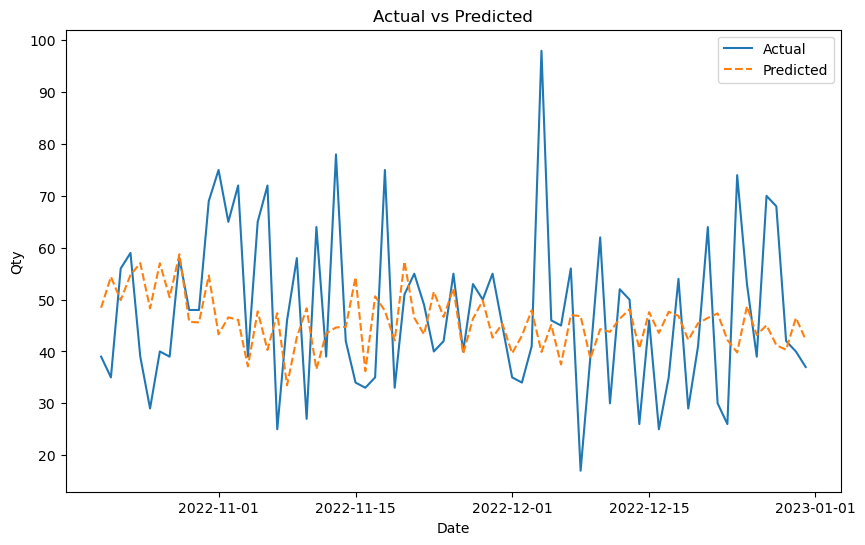

In [36]:
y_actual = test_data
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_actual, label='Actual')
plt.plot(test_data.index, y_pred_out, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

RMSE : 16.534108916879127
MAE : 12.636835449800383


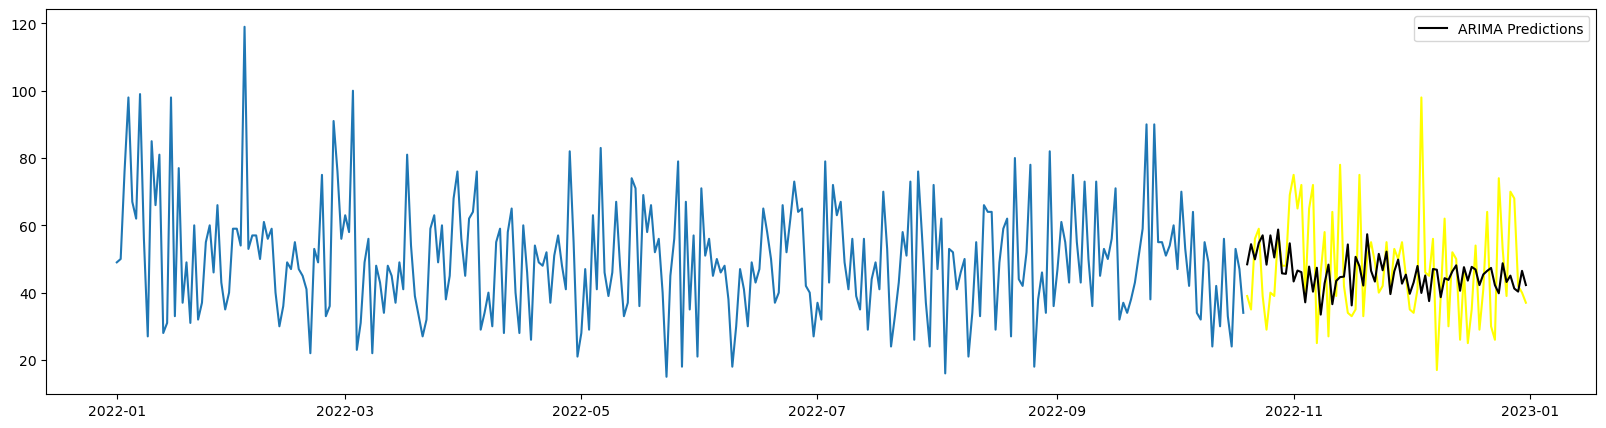

In [37]:
eval(test_data, y_pred_out)
plt.figure(figsize=(20,5))
plt.plot(train_data)
plt.plot(test_data,color='yellow')
plt.plot(y_pred_out, color='black', label = 'ARIMA Predictions')
plt.legend()

### Manual Hyperparameter Tuning

RMSE : 15.497004697728686
MAE : 12.640024536525695
Best Model Order: (6, 1, 7)


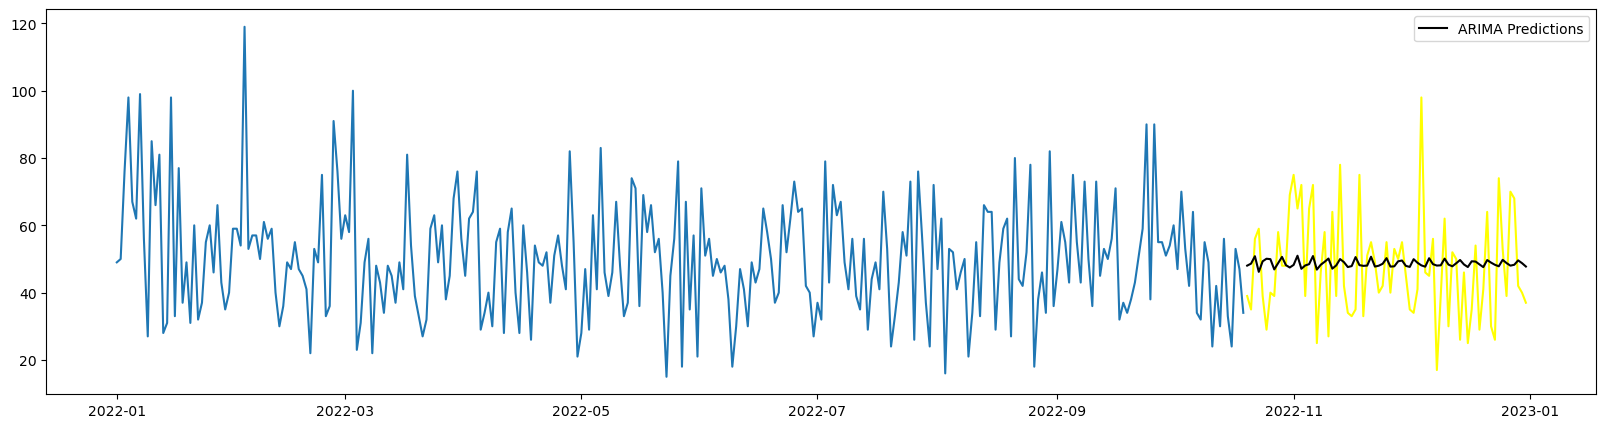

In [39]:
p_values = range(0, 10)  # Adjust as needed
d_values = range(0, 2)  # Adjust as needed
q_values = range(0, 10)  # Adjust as needed

def rmse(y_actual, y_pred_hyper):
    print(f'RMSE : {mean_squared_error(y_actual,y_pred_hyper)**0.5}')
def eval(y_actual, y_pred_hyper):
    rmse(y_actual, y_pred_hyper)
    print(f'MAE : {mean_absolute_error(y_actual,y_pred_hyper)}')

best_mse = float('inf')
best_order = None

# Perform grid search to find the best ARIMA hyperparameters
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                y = train_data['Qty']
                model = ARIMA(y, order=(p, d, q))
                model_fit = model.fit()
                y_pred_hyper = model_fit.forecast(steps=len(test_data))

                # Calculate Mean Squared Error (MSE)
                mse = mean_squared_error(test_data['Qty'], y_pred_hyper)
                
                if mse < best_mse:
                    best_mse = mse
                    best_order = (p, d, q)

            except Exception as e:
                continue

# Train the best ARIMA model using the best hyperparameters
best_p, best_d, best_q = best_order
y = train_data['Qty']
best_model = ARIMA(y, order=(best_p, best_d, best_q))
best_model_fit = best_model.fit()

# Make predictions with the best model
y_pred_hyper = best_model_fit.forecast(steps=len(test_data))

# Evaluate the model
eval(test_data['Qty'], y_pred_hyper)
print(f'Best Model Order: ({best_p}, {best_d}, {best_q})')

# Plot the results
plt.figure(figsize=(20, 5))
plt.plot(train_data['Qty'])
plt.plot(test_data['Qty'], color='yellow')
plt.plot(y_pred_hyper, color='black', label='ARIMA Predictions')
plt.legend()
plt.show()

### Forecast with the best option

In [40]:
#Apply model to forecast data
model = ARIMA(df_reg, order=(39, 2, 9))
model_fit = model.fit()
forecast = model_fit.forecast(steps=31)

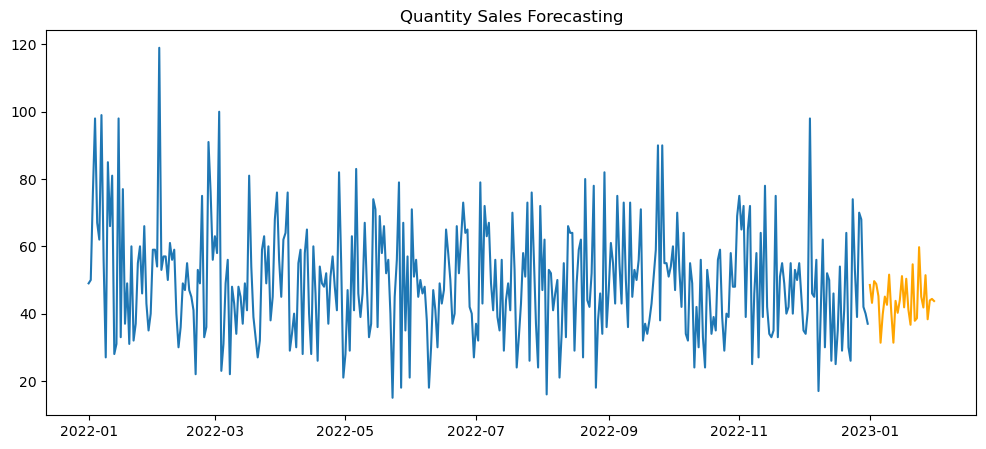

In [41]:
#Plot forecasting
plt.figure(figsize=(12,5))
plt.plot(df_reg)
plt.plot(forecast,color='orange')
plt.title('Quantity Sales Forecasting')
plt.show()

In [42]:
forecast.describe()

count    31.000000
mean     44.083597
std       6.275007
min      31.356339
25%      40.347365
50%      43.801777
75%      48.660629
max      59.752672
Name: predicted_mean, dtype: float64

Manual Base Model shows best MAE result with 12.63

From forecast statistical description, average of quantity sales is 44 pcs/day for 1 month

## Clustering

In [43]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers


In [44]:
df.corr()

,CustomerID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude
CustomerID,1.000000,-0.014821,-0.012024,-0.025266,0.005470,-0.021120,-0.015863,0.005440,0.005166,-0.004492
Price_x,-0.014821,1.000000,-0.354614,0.440046,-0.031782,0.013781,0.012132,0.000636,-0.027438,0.017238
Qty,-0.012024,-0.354614,1.000000,0.620804,0.012169,-0.026745,-0.011920,-0.027724,-0.007179,0.006805
TotalAmount,-0.025266,0.440046,0.620804,1.000000,-0.011283,-0.016458,-0.009479,-0.024816,-0.030704,0.026535
StoreID,0.005470,-0.031782,0.012169,-0.011283,1.000000,-0.004783,0.000449,0.000739,0.471039,-0.095710
Age,-0.021120,0.013781,-0.026745,-0.016458,-0.004783,1.000000,-0.026879,0.485532,0.009474,0.015670
Gender,-0.015863,0.012132,-0.011920,-0.009479,0.000449,-0.026879,1.000000,-0.067612,-0.006624,-0.001018
Income,0.005440,0.000636,-0.027724,-0.024816,0.000739,0.485532,-0.067612,1.000000,0.016401,0.003471
Latitude,0.005166,-0.027438,-0.007179,-0.030704,0.471039,0.009474,-0.006624,0.016401,1.000000,-0.396128
Longitude,-0.004492,0.017238,0.006805,0.026535,-0.095710,0.015670,-0.001018,0.003471,-0.396128,1.000000


In [45]:
df_cluster = df.groupby(['CustomerID']).agg({'TransactionID':'count','Qty':'sum', 'TotalAmount':'sum'}).reset_index()

In [46]:
df_cluster.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [47]:
cluster = df_cluster.drop(columns=['CustomerID'])
cluster_normalize = preprocessing.normalize(cluster)

In [48]:
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cluster_normalize)
    wcss.append(kmeans.inertia_)

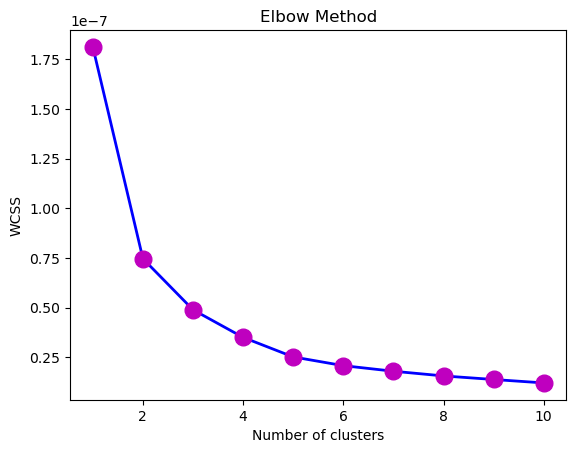

In [49]:
plt.plot(list(range(1,11)), wcss, color = 'blue', marker = 'o', linewidth=2, markersize=12, markerfacecolor= 'm', markeredgecolor= 'm')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
optimal_cluster_count = 3

In [52]:
kmeans = KMeans(n_clusters=optimal_cluster_count, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(cluster_normalize)

In [53]:
cluster['cluster']=cluster_labels
cluster

,TransactionID,Qty,TotalAmount,cluster
0,17,60,623300,1
1,13,57,392300,2
2,15,56,446200,0
3,10,46,302500,2
4,7,27,268600,1
...,...,...,...,...
439,13,37,269400,2
440,18,62,577700,1
441,18,68,587200,0
442,11,42,423300,1


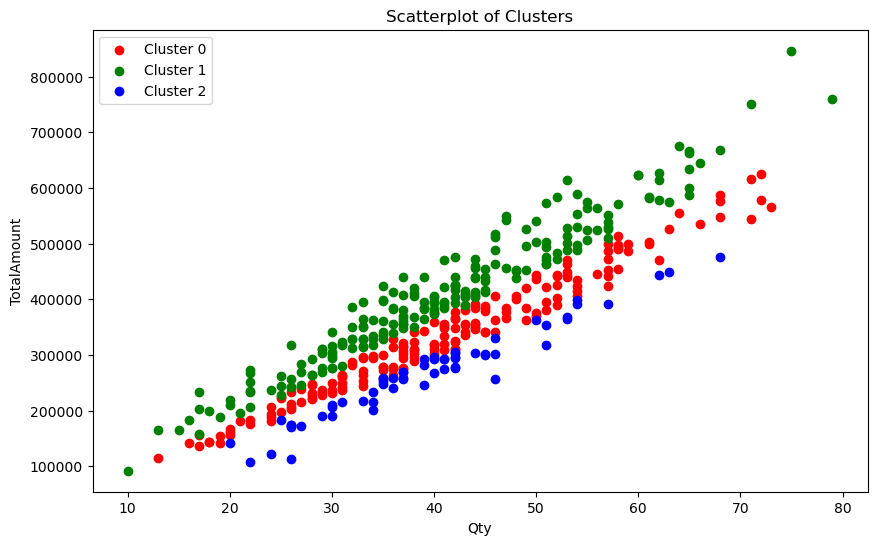

In [54]:
# Create a scatterplot for visualization
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm']  # Add more colors as needed

for cluster_num in range(optimal_cluster_count):
    cluster_data = cluster[cluster['cluster'] == cluster_num]
    plt.scatter(cluster_data['Qty'], cluster_data['TotalAmount'], c=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.xlabel('Qty')
plt.ylabel('TotalAmount')
plt.title('Scatterplot of Clusters')
plt.legend()
plt.show()

In [55]:
cluster['CustomerID'] = df_cluster['CustomerID']
cluster_mean = cluster.groupby(['cluster']).agg({
    'CustomerID':'count',
    'TransactionID':'mean',
    'Qty':'mean', 
    'TotalAmount':'mean'
})
cluster_mean.sort_values('CustomerID', ascending = False)

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
1,204,11.642157,40.838235,409532.843137
0,179,11.005587,41.346369,338749.720670
2,61,10.344262,39.229508,268652.459016


In [ ]:
Cluster 2 = Merupakan segment customer dengan jumlah transaksi dan total quantity terendah, serta menghabiskan uang paling sedikit
Rekomendasi = Memberikan voucher diskon produk Kalbe Nutritionals kepada customer cluster 2 untuk transaksi selanjutnya, sehingga terjadi pembelian berulang dan memberikan promo buy 1 get 1 atau bundling produk Kalbe Nutritionals untuk meningkatkan jumlah Quantity sales
Cluster 1 = Merupakan segment customer dengan jumlah transaksi tertinggi dan menghabiskan uang paling banyak
Rekomendasi = Memberikan voucher diskon untuk transaksi produk Kalbe Nutritionals selanjutnya
Cluster 0 = Merupakan segment customer dengan total quantity terbanyak dan jumlah transaksi yang sedikit lebih kecil dibanding cluster 1
Rekomendasi = Memberikan promo buy 1 get 1 atau bundling produk Kalbe Nutritionals untuk meningkatkan jumlah Quantity sales